In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import random
import time
import warnings
warnings.filterwarnings('ignore')
print('-'*25)
from subprocess import check_output

-------------------------


##**Data Processing**

In [2]:
df = pd.read_csv('application_train.csv')

In [3]:
df.head(10)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,100008,0,Cash loans,M,N,Y,0,99000.0,490495.5,27517.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
6,100009,0,Cash loans,F,Y,Y,1,171000.0,1560726.0,41301.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,2.0
7,100010,0,Cash loans,M,Y,Y,0,360000.0,1530000.0,42075.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,100011,0,Cash loans,F,N,Y,0,112500.0,1019610.0,33826.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
9,100012,0,Revolving loans,M,N,Y,0,135000.0,405000.0,20250.0,...,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7760 entries, 0 to 7759
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(103), int64(3), object(16)
memory usage: 7.2+ MB


In [5]:
df.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,7760.000000,7760.000000,7760.000000,7.760000e+03,7.760000e+03,7760.000000,7.755000e+03,7759.000000,7759.000000,7759.000000,...,7759.000000,7759.000000,7759.000000,7759.000000,6714.000000,6714.000000,6714.000000,6714.000000,6714.000000,6714.000000
mean,104530.748969,0.077062,0.413273,1.672455e+05,6.004550e+05,27071.067526,5.400644e+05,0.021036,-16041.853718,64030.546849,...,0.006960,0.000258,0.000387,0.000258,0.007447,0.008043,0.033810,0.271522,0.268245,1.886804
std,2614.054159,0.266707,0.715814,9.492550e+04,4.022087e+05,14428.599561,3.691922e+05,0.013959,4337.339972,141480.694138,...,0.083139,0.016054,0.019661,0.016054,0.087697,0.121786,0.197302,0.928392,0.614135,1.862868
min,100002.000000,0.000000,0.000000,2.565000e+04,4.500000e+04,2596.500000,4.500000e+04,0.000938,-25160.000000,-15632.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,102273.500000,0.000000,0.000000,1.125000e+05,2.700000e+05,16407.000000,2.385000e+05,0.010006,-19599.000000,-2801.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,104538.500000,0.000000,0.000000,1.440000e+05,5.096025e+05,25033.500000,4.500000e+05,0.018850,-15811.000000,-1221.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,106807.250000,0.000000,1.000000,2.025000e+05,8.100000e+05,34587.000000,6.795000e+05,0.028663,-12434.500000,-291.500000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
max,109052.000000,1.000000,7.000000,1.935000e+06,2.925000e+06,135936.000000,2.925000e+06,0.072508,-7705.000000,365243.000000,...,1.000000,1.000000,1.000000,1.000000,2.000000,4.000000,4.000000,16.000000,8.000000,13.000000


#**Data Cleaning**

In [6]:
# Checking missing data
total = df.isnull().sum().sort_values(ascending = False)
percent = (df.isnull().sum()/df.isnull().count()*100).sort_values(ascending = False)
missing_data  = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(30)

,Total,Percent
COMMONAREA_MODE,5409,69.703608
COMMONAREA_AVG,5409,69.703608
COMMONAREA_MEDI,5409,69.703608
NONLIVINGAPARTMENTS_MODE,5385,69.394330
NONLIVINGAPARTMENTS_AVG,5385,69.394330
NONLIVINGAPARTMENTS_MEDI,5385,69.394330
FONDKAPREMONT_MODE,5316,68.505155
LIVINGAPARTMENTS_AVG,5303,68.337629
LIVINGAPARTMENTS_MODE,5303,68.337629
LIVINGAPARTMENTS_MEDI,5303,68.337629


In [7]:
df.drop_duplicates()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7755,109048,0,Cash loans,F,Y,Y,1,337500.0,1071909.0,31473.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
7756,109049,0,Cash loans,F,N,Y,0,135000.0,691020.0,19935.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0
7757,109050,0,Cash loans,F,N,Y,0,58500.0,781920.0,25969.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
7758,109051,0,Cash loans,M,Y,N,0,112500.0,584766.0,28260.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [8]:
df.dropna(axis=0, how='any')

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
71,100083,0,Cash loans,M,Y,Y,0,103500.0,573628.5,24435.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0
124,100145,0,Cash loans,F,Y,Y,1,202500.0,260725.5,16789.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0
152,100179,0,Cash loans,F,Y,N,0,202500.0,675000.0,53329.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,4.0
161,100190,0,Cash loans,M,Y,N,0,162000.0,263686.5,24781.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0
255,100295,1,Cash loans,M,Y,N,1,225000.0,1019205.0,31032.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7546,108797,0,Cash loans,F,Y,Y,2,162000.0,1078200.0,31653.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7586,108847,0,Cash loans,M,Y,Y,0,130050.0,81000.0,4324.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
7605,108867,0,Cash loans,F,Y,Y,0,630000.0,1418868.0,72076.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
7614,108876,0,Revolving loans,M,Y,N,2,238500.0,180000.0,9000.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


#**Visualization**

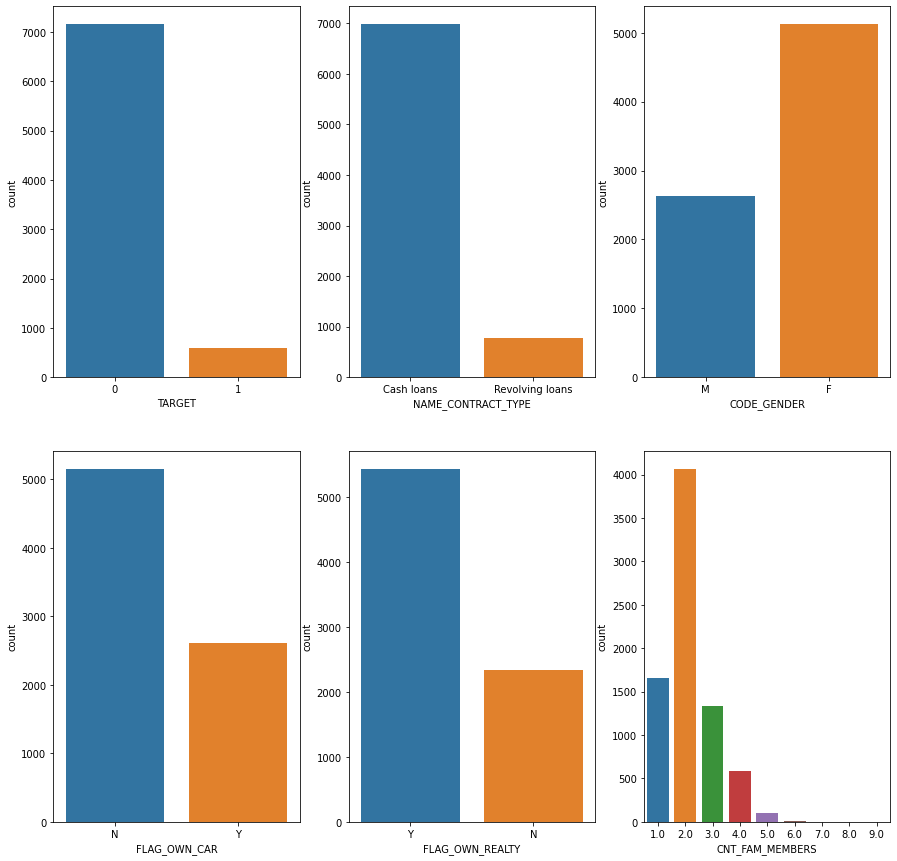

In [10]:
fig, saxis = plt.subplots(2, 3,figsize=(15,15))

sns.countplot(x ='TARGET',data=df, ax = saxis [0,0])
sns.countplot(x='NAME_CONTRACT_TYPE',data=df, ax = saxis [0,1])
sns.countplot(x='CODE_GENDER',data=df, ax = saxis [0,2])
              
sns.countplot(x ='FLAG_OWN_CAR',data=df, ax = saxis [1,0])
sns.countplot(x='FLAG_OWN_REALTY',data=df, ax = saxis [1,1])
sns.countplot(x='CNT_FAM_MEMBERS',data=df, ax = saxis [1,2])

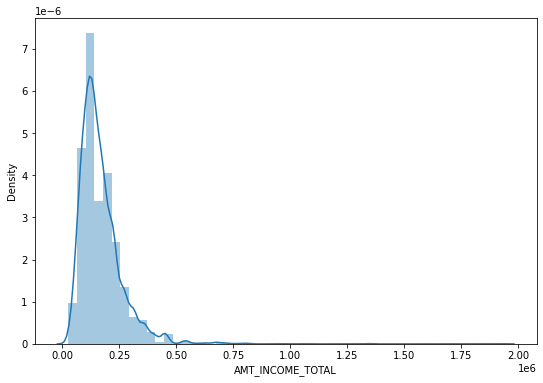

In [11]:
plt.figure(figsize=(9,6))
sns.distplot(df.loc[df['AMT_INCOME_TOTAL'] < 0.25e7, 'AMT_INCOME_TOTAL'].dropna())
plt.show()

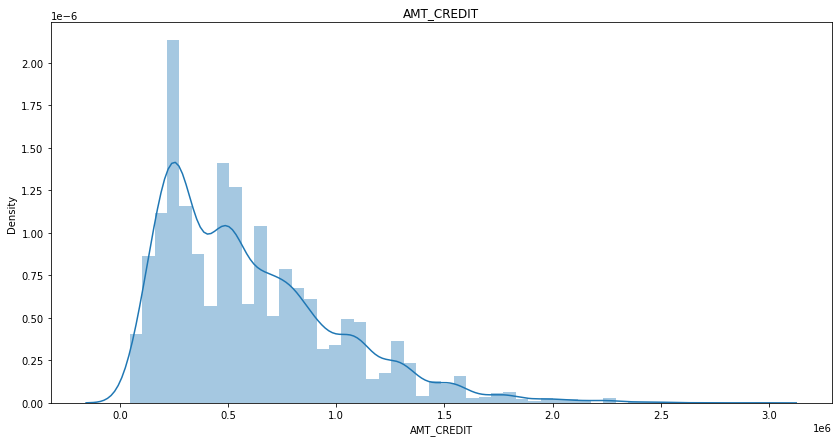

In [12]:
plt.figure(figsize=(14,7))
plt.title("AMT_CREDIT")
ax = sns.distplot(df["AMT_CREDIT"])

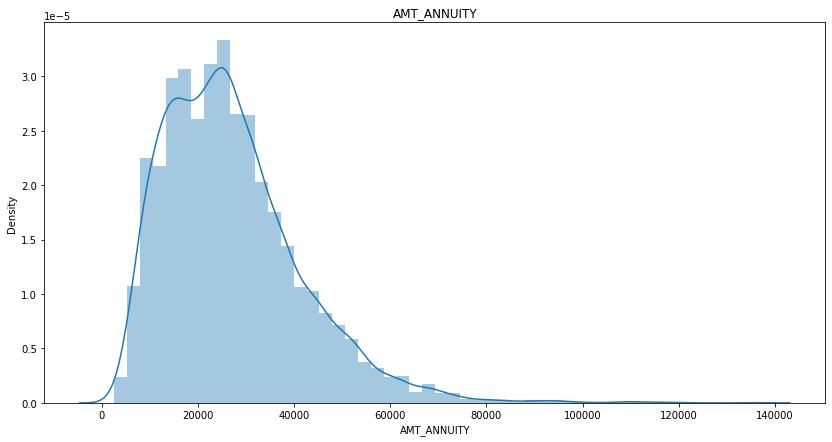

In [13]:
plt.figure(figsize=(14,7))
plt.title("AMT_ANNUITY")
ax = sns.distplot(df["AMT_ANNUITY"])

Text(0.5, 1.0, 'NAME_INCOME_TYPE')

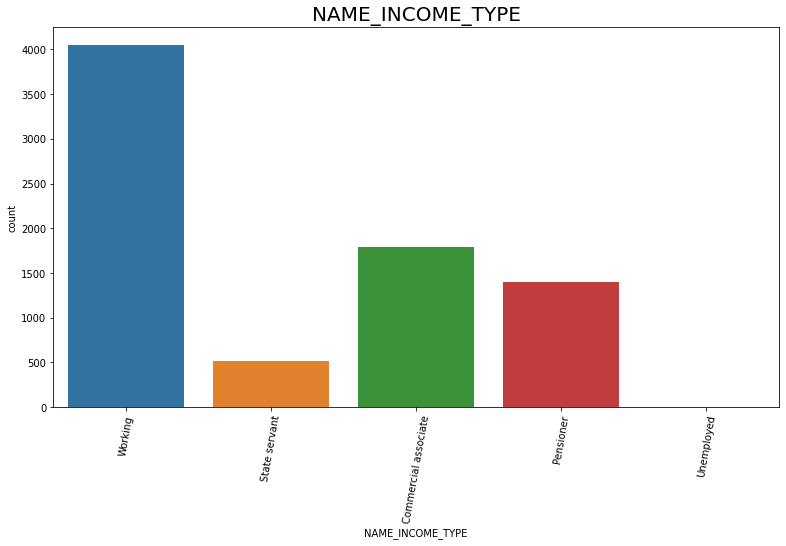

In [14]:
fig, ax = plt.subplots(figsize=(13,7))
sns.countplot(x='NAME_INCOME_TYPE',data=df)
plt.xlabel("NAME_INCOME_TYPE")
plt.xticks(rotation=80)
plt.title('NAME_INCOME_TYPE', fontsize=20)

(array([0, 1, 2, 3, 4]), <a list of 5 Text major ticklabel objects>)

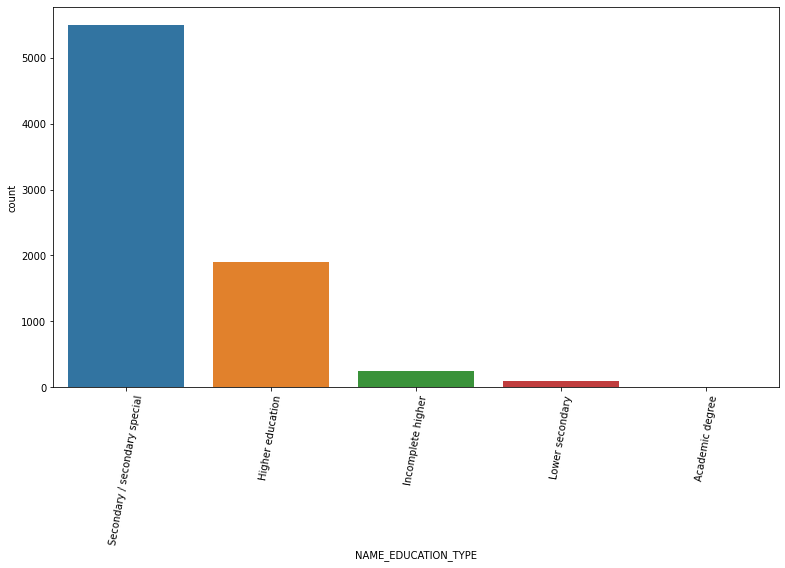

In [15]:
fig, ax = plt.subplots(figsize=(13,7))
sns.countplot(x='NAME_EDUCATION_TYPE',data=df)
plt.xlabel("NAME_EDUCATION_TYPE")
plt.xticks(rotation=80)

Text(0.5, 1.0, 'NAME_FAMILY_STATUS')

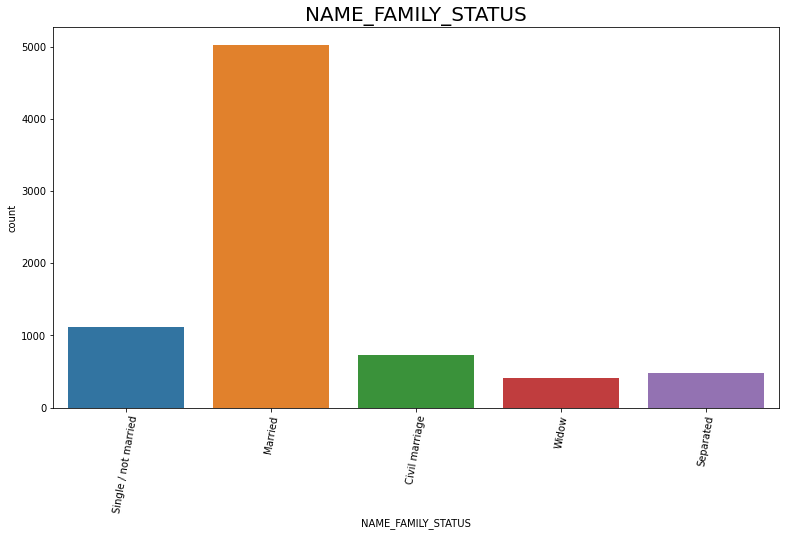

In [16]:
fig, ax = plt.subplots(figsize=(13,7))
sns.countplot(x='NAME_FAMILY_STATUS',data=df)
plt.xlabel("NAME_FAMILY_STATUS")
plt.xticks(rotation=80)
plt.title('NAME_FAMILY_STATUS', fontsize=20)

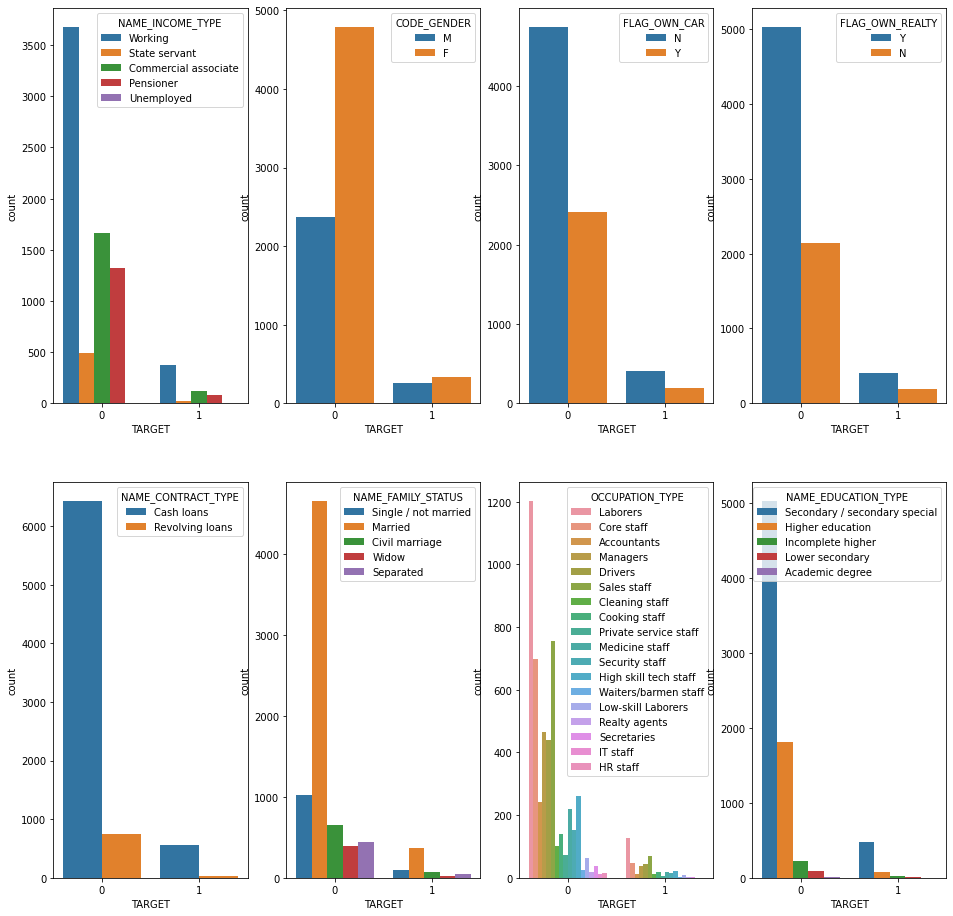

In [18]:
fig, saxis = plt.subplots(2, 4,figsize=(16,16))

sns.countplot(x='TARGET',hue='NAME_INCOME_TYPE',data=df, ax = saxis [0,0])
sns.countplot(x='TARGET',hue='CODE_GENDER',data=df, ax = saxis [0,1])
sns.countplot(x='TARGET',hue='FLAG_OWN_CAR',data=df, ax = saxis [0,2])
sns.countplot(x='TARGET',hue='FLAG_OWN_REALTY',data=df, ax = saxis [0,3])

sns.countplot(x='TARGET',hue='NAME_CONTRACT_TYPE',data=df, ax = saxis [1,0])
sns.countplot(x='TARGET',hue='NAME_FAMILY_STATUS',data=df, ax = saxis [1,1])
sns.countplot(x='TARGET',hue='OCCUPATION_TYPE',data=df, ax = saxis [1,2])
sns.countplot(x='TARGET',hue='NAME_EDUCATION_TYPE',data=df, ax = saxis [1,3])

In [19]:
columns_to_keep = missing_data[missing_data['Percent'] < 10]
columns_to_keep.index.tolist()

['NAME_TYPE_SUITE',
 'OBS_30_CNT_SOCIAL_CIRCLE',
 'DEF_60_CNT_SOCIAL_CIRCLE',
 'OBS_60_CNT_SOCIAL_CIRCLE',
 'DEF_30_CNT_SOCIAL_CIRCLE',
 'EXT_SOURCE_2',
 'AMT_GOODS_PRICE',
 'LIVE_REGION_NOT_WORK_REGION',
 'REG_REGION_NOT_WORK_REGION',
 'REG_CITY_NOT_WORK_CITY',
 'LIVE_CITY_NOT_WORK_CITY',
 'DAYS_LAST_PHONE_CHANGE',
 'FLAG_DOCUMENT_2',
 'FLAG_DOCUMENT_3',
 'FLAG_DOCUMENT_4',
 'FLAG_DOCUMENT_5',
 'FLAG_DOCUMENT_6',
 'FLAG_DOCUMENT_7',
 'FLAG_DOCUMENT_8',
 'FLAG_DOCUMENT_9',
 'FLAG_DOCUMENT_10',
 'FLAG_DOCUMENT_11',
 'FLAG_DOCUMENT_12',
 'FLAG_DOCUMENT_13',
 'FLAG_DOCUMENT_14',
 'FLAG_DOCUMENT_15',
 'FLAG_DOCUMENT_16',
 'FLAG_DOCUMENT_17',
 'FLAG_DOCUMENT_18',
 'FLAG_DOCUMENT_19',
 'FLAG_DOCUMENT_20',
 'REG_CITY_NOT_LIVE_CITY',
 'ORGANIZATION_TYPE',
 'FLAG_MOBIL',
 'FLAG_EMP_PHONE',
 'REG_REGION_NOT_LIVE_REGION',
 'HOUR_APPR_PROCESS_START',
 'WEEKDAY_APPR_PROCESS_START',
 'REGION_RATING_CLIENT_W_CITY',
 'REGION_RATING_CLIENT',
 'CNT_FAM_MEMBERS',
 'FLAG_EMAIL',
 'FLAG_PHONE',
 'FLAG_CONT

In [20]:
df = df[columns_to_keep.index.tolist()]

In [21]:
df.shape
df.isnull().sum()

NAME_TYPE_SUITE             34
OBS_30_CNT_SOCIAL_CIRCLE    33
DEF_60_CNT_SOCIAL_CIRCLE    33
OBS_60_CNT_SOCIAL_CIRCLE    33
DEF_30_CNT_SOCIAL_CIRCLE    33
                            ..
CNT_CHILDREN                 0
AMT_INCOME_TOTAL             0
AMT_ANNUITY                  0
TARGET                       0
SK_ID_CURR                   0
Length: 65, dtype: int64

In [22]:
df = df.dropna()
df.shape

(7670, 65)

In [23]:
df = df.set_index('SK_ID_CURR')

In [24]:
# Change all negative values
df['DAYS_LAST_PHONE_CHANGE'] = abs(df['DAYS_LAST_PHONE_CHANGE'])
df['DAYS_ID_PUBLISH'] = abs(df['DAYS_ID_PUBLISH'])
df['DAYS_REGISTRATION'] = abs(df['DAYS_REGISTRATION'])
df['DAYS_EMPLOYED'] = abs(df['DAYS_EMPLOYED'])

# Change the days from birth to age
df['DAYS_BIRTH'] = abs(df['DAYS_BIRTH']) // 365
df.head()

,NAME_TYPE_SUITE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,EXT_SOURCE_2,AMT_GOODS_PRICE,LIVE_REGION_NOT_WORK_REGION,REG_REGION_NOT_WORK_REGION,REG_CITY_NOT_WORK_CITY,...,NAME_INCOME_TYPE,CODE_GENDER,FLAG_OWN_REALTY,NAME_CONTRACT_TYPE,FLAG_OWN_CAR,AMT_CREDIT,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_ANNUITY,TARGET
SK_ID_CURR,,,,,,,,,,,,,,,,,,,,,
100002,Unaccompanied,2.0,2.0,2.0,2.0,0.262949,351000.0,0.0,0.0,0.0,...,Working,M,Y,Cash loans,N,406597.5,0,202500.0,24700.5,1
100003,Family,1.0,0.0,1.0,0.0,0.622246,1129500.0,0.0,0.0,0.0,...,State servant,F,N,Cash loans,N,1293502.5,0,270000.0,35698.5,0
100004,Unaccompanied,0.0,0.0,0.0,0.0,0.555912,135000.0,0.0,0.0,0.0,...,Working,M,Y,Revolving loans,Y,135000.0,0,67500.0,6750.0,0
100006,Unaccompanied,2.0,0.0,2.0,0.0,0.650442,297000.0,0.0,0.0,0.0,...,Working,F,Y,Cash loans,N,312682.5,0,135000.0,29686.5,0
100007,Unaccompanied,0.0,0.0,0.0,0.0,0.322738,513000.0,0.0,0.0,1.0,...,Working,M,Y,Cash loans,N,513000.0,0,121500.0,21865.5,0


In [25]:
df = df.replace(365243, np.nan)
df = df.replace('XNA', np.nan)

In [26]:
df.DAYS_EMPLOYED.isnull().sum()

1380

In [27]:
df['DAYS_EMPLOYED'] = df['DAYS_EMPLOYED'].interpolate()

In [28]:
df.DAYS_EMPLOYED.isnull().sum()

0

In [29]:
# Replace categorical values to binary
df = df.replace({'FLAG_OWN_CAR' : { 'N' : 0, 'Y' : 1 }, 'CODE_GENDER' : { 'M' : 0, 'F' : 1 }, 'FLAG_OWN_REALTY' : { 'N' : 0, 'Y' : 1 }})

In [30]:
df.FLAG_OWN_CAR.unique()

array([0, 1])

In [31]:
df.NAME_EDUCATION_TYPE.unique()

array(['Secondary / secondary special', 'Higher education',
       'Incomplete higher', 'Lower secondary', 'Academic degree'],
      dtype=object)

In [32]:
df.WEEKDAY_APPR_PROCESS_START.unique()

array(['WEDNESDAY', 'MONDAY', 'THURSDAY', 'SUNDAY', 'SATURDAY', 'FRIDAY',
       'TUESDAY'], dtype=object)

In [33]:
# Change categorical ordinal variables to numeric
df = df.replace({'NAME_EDUCATION_TYPE' : { 'Lower secondary' : 0, 'Secondary / secondary special' : 1, 'Incomplete higher': 2, 'Higher education': 3, 'Academic degree': 4 }, 'WEEKDAY_APPR_PROCESS_START' : { 'MONDAY' : 0, 'TUESDAY' : 1 , 'WEDNESDAY': 2, 'THURSDAY': 3, 'FRIDAY': 4, 'SATURDAY': 5, 'SUNDAY': 6}})

In [34]:
df = pd.get_dummies(data=df, columns=['NAME_TYPE_SUITE', 'NAME_CONTRACT_TYPE', 'NAME_FAMILY_STATUS', 'NAME_INCOME_TYPE', \
                             'NAME_HOUSING_TYPE', 'ORGANIZATION_TYPE'])

In [35]:
df_to_scale = df[['AMT_GOODS_PRICE','AMT_ANNUITY', 'DAYS_LAST_PHONE_CHANGE', 'AMT_CREDIT','AMT_INCOME_TOTAL', 'DAYS_ID_PUBLISH','DAYS_REGISTRATION', 'DAYS_EMPLOYED','DAYS_BIRTH', 'HOUR_APPR_PROCESS_START']]

In [37]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler

cT = ColumnTransformer([

        ('somename', StandardScaler(), df_to_scale.columns.tolist())

    ], remainder='passthrough')

scaled_data = pd.DataFrame(cT.fit_transform(df_to_scale), columns=df_to_scale.columns.tolist())
scaled_data.head()

,AMT_GOODS_PRICE,AMT_ANNUITY,DAYS_LAST_PHONE_CHANGE,AMT_CREDIT,AMT_INCOME_TOTAL,DAYS_ID_PUBLISH,DAYS_REGISTRATION,DAYS_EMPLOYED,DAYS_BIRTH,HOUR_APPR_PROCESS_START
0,-0.513337,-0.167531,0.210318,-0.484186,0.379240,-0.560535,-0.378681,-0.796603,-1.556704,-0.644309
1,1.598099,0.595628,-0.161118,1.723279,1.099365,-1.761294,-1.074559,-0.549216,0.129213,-0.333344
2,-1.099168,-1.413128,-0.176898,-1.160179,-1.061011,-0.290709,-0.205701,-0.981581,0.719284,-0.955274
3,-0.659794,0.178451,-0.417239,-0.717936,-0.340886,-0.352421,1.369493,0.281841,0.719284,1.532444
4,-0.073963,-0.364253,0.176330,-0.219355,-0.484911,0.317876,-0.191286,0.281392,0.887876,-0.333344


In [38]:
scaled_data.index = df.index.copy()
df = df.drop(columns=df_to_scale.columns.tolist())
print(scaled_data.shape)
print(df.shape)

(7670, 10)
(7670, 130)


In [39]:
df1 = pd.concat([df, scaled_data], axis=1)
df1.head()

,OBS_30_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,EXT_SOURCE_2,LIVE_REGION_NOT_WORK_REGION,REG_REGION_NOT_WORK_REGION,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,FLAG_DOCUMENT_2,...,AMT_GOODS_PRICE,AMT_ANNUITY,DAYS_LAST_PHONE_CHANGE,AMT_CREDIT,AMT_INCOME_TOTAL,DAYS_ID_PUBLISH,DAYS_REGISTRATION,DAYS_EMPLOYED,DAYS_BIRTH,HOUR_APPR_PROCESS_START
SK_ID_CURR,,,,,,,,,,,,,,,,,,,,,
100002,2.0,2.0,2.0,2.0,0.262949,0.0,0.0,0.0,0.0,0.0,...,-0.513337,-0.167531,0.210318,-0.484186,0.379240,-0.560535,-0.378681,-0.796603,-1.556704,-0.644309
100003,1.0,0.0,1.0,0.0,0.622246,0.0,0.0,0.0,0.0,0.0,...,1.598099,0.595628,-0.161118,1.723279,1.099365,-1.761294,-1.074559,-0.549216,0.129213,-0.333344
100004,0.0,0.0,0.0,0.0,0.555912,0.0,0.0,0.0,0.0,0.0,...,-1.099168,-1.413128,-0.176898,-1.160179,-1.061011,-0.290709,-0.205701,-0.981581,0.719284,-0.955274
100006,2.0,0.0,2.0,0.0,0.650442,0.0,0.0,0.0,0.0,0.0,...,-0.659794,0.178451,-0.417239,-0.717936,-0.340886,-0.352421,1.369493,0.281841,0.719284,1.532444
100007,0.0,0.0,0.0,0.0,0.322738,0.0,0.0,1.0,1.0,0.0,...,-0.073963,-0.364253,0.176330,-0.219355,-0.484911,0.317876,-0.191286,0.281392,0.887876,-0.333344


In [40]:
df1.shape


(7670, 140)

In [41]:
df1.isnull().sum()

OBS_30_CNT_SOCIAL_CIRCLE    0
DEF_60_CNT_SOCIAL_CIRCLE    0
OBS_60_CNT_SOCIAL_CIRCLE    0
DEF_30_CNT_SOCIAL_CIRCLE    0
EXT_SOURCE_2                0
                           ..
DAYS_ID_PUBLISH             0
DAYS_REGISTRATION           0
DAYS_EMPLOYED               0
DAYS_BIRTH                  0
HOUR_APPR_PROCESS_START     0
Length: 140, dtype: int64

In [42]:
df1 = df1.dropna()

#**Data Test**

In [43]:
from sklearn import model_selection


X = df1.loc[:, df1.columns != 'TARGET']
Y = df1.loc[:, df1.columns == 'TARGET']

X_train, X_test, Y_train, Y_test = model_selection.train_test_split(X, Y, train_size = 0.7)

In [44]:
df1.corr()

,OBS_30_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,EXT_SOURCE_2,LIVE_REGION_NOT_WORK_REGION,REG_REGION_NOT_WORK_REGION,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,FLAG_DOCUMENT_2,...,AMT_GOODS_PRICE,AMT_ANNUITY,DAYS_LAST_PHONE_CHANGE,AMT_CREDIT,AMT_INCOME_TOTAL,DAYS_ID_PUBLISH,DAYS_REGISTRATION,DAYS_EMPLOYED,DAYS_BIRTH,HOUR_APPR_PROCESS_START
OBS_30_CNT_SOCIAL_CIRCLE,1.000000,0.244854,0.998476,0.324873,-0.026843,-0.021953,-0.027275,-0.001780,-0.003006,NaN,...,0.010854,0.003831,0.010785,0.011639,-0.027535,-0.000265,-0.012868,-0.004477,-0.004691,-0.014795
DEF_60_CNT_SOCIAL_CIRCLE,0.244854,1.000000,0.246354,0.856445,-0.023300,-0.028366,-0.020333,-0.000922,0.000950,NaN,...,-0.022435,-0.030620,-0.015147,-0.019807,-0.034353,-0.002263,-0.011093,-0.014961,-0.003589,-0.018367
OBS_60_CNT_SOCIAL_CIRCLE,0.998476,0.246354,1.000000,0.326119,-0.026555,-0.021987,-0.026998,-0.002297,-0.003411,NaN,...,0.011932,0.005253,0.011828,0.012815,-0.027886,-0.001082,-0.012315,-0.003977,-0.003292,-0.014701
DEF_30_CNT_SOCIAL_CIRCLE,0.324873,0.856445,0.326119,1.000000,-0.026950,-0.015113,-0.009441,-0.004616,-0.005027,NaN,...,-0.019056,-0.026531,-0.015600,-0.016408,-0.040840,-0.000681,-0.018685,-0.012028,-0.003622,-0.010068
EXT_SOURCE_2,-0.026843,-0.023300,-0.026555,-0.026950,1.000000,0.023354,0.017221,-0.064621,-0.047391,NaN,...,0.158397,0.143602,0.187561,0.150033,0.161792,0.052984,0.085539,0.091687,0.102346,0.139664
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
DAYS_ID_PUBLISH,-0.000265,-0.002263,-0.001082,-0.000681,0.052984,-0.031547,-0.048362,-0.083412,-0.040129,NaN,...,0.032594,0.015027,0.080468,0.031720,-0.020626,1.000000,0.122417,0.078709,0.265718,-0.028692
DAYS_REGISTRATION,-0.012868,-0.011093,-0.012315,-0.018685,0.085539,-0.011255,-0.030257,-0.096884,-0.061746,NaN,...,-0.000443,-0.030162,0.046881,0.004723,-0.071983,0.122417,1.000000,0.129250,0.346799,0.005264
DAYS_EMPLOYED,-0.004477,-0.014961,-0.003977,-0.012028,0.091687,-0.066671,-0.086135,-0.109058,-0.055560,NaN,...,0.115425,0.080243,0.134374,0.112371,0.045340,0.078709,0.129250,1.000000,0.246574,-0.022486
DAYS_BIRTH,-0.004691,-0.003589,-0.003292,-0.003622,0.102346,-0.078309,-0.091066,-0.232797,-0.145470,NaN,...,0.078374,0.001390,0.091911,0.080452,-0.074969,0.265718,0.346799,0.246574,1.000000,-0.086280


#**Deployment Machine Learning and Evaluate**





---



---



#**Logistic Regression**
Logistic Regression is used when the dependent variable(target) is categorical

In [45]:
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score


lr = LogisticRegression()

lr.fit(X_train, Y_train)

Y_pred_class = lr.predict(X_test)

print(classification_report(Y_test, Y_pred_class))

print(roc_auc_score(Y_test, Y_pred_class))

              precision    recall  f1-score   support

           0       0.92      1.00      0.96      2116
           1       1.00      0.01      0.02       185

    accuracy                           0.92      2301
   macro avg       0.96      0.51      0.49      2301
weighted avg       0.93      0.92      0.88      2301

0.5054054054054054


#**Decision Tree**
Decision Trees (DTs) are a non-parametric supervised learning method used for classification and regression. The goal is to create a model that predicts the value of a target variable by learning simple decision rules inferred from the data features. A tree can be seen as a piecewise constant approximation.

In [46]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(random_state=42)

dt.fit(X_train, Y_train)

Y_pred_class = dt.predict(X_test)

print(classification_report(Y_test, Y_pred_class))

print(roc_auc_score(Y_test, Y_pred_class))

              precision    recall  f1-score   support

           0       0.92      0.91      0.91      2116
           1       0.11      0.14      0.12       185

    accuracy                           0.84      2301
   macro avg       0.52      0.52      0.52      2301
weighted avg       0.86      0.84      0.85      2301

0.5200722934654881


#**Random Forest**
Random forest is a commonly-used machine learning algorithm trademarked by Leo Breiman and Adele Cutler, which combines the output of multiple decision trees to reach a single result.

In [47]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(max_depth=5, random_state=42)

rf.fit(X_train, Y_train)

Y_pred_class = rf.predict(X_test)

print(classification_report(Y_test, Y_pred_class))

print(roc_auc_score(Y_test, Y_pred_class))

              precision    recall  f1-score   support

           0       0.92      1.00      0.96      2116
           1       0.00      0.00      0.00       185

    accuracy                           0.92      2301
   macro avg       0.46      0.50      0.48      2301
weighted avg       0.85      0.92      0.88      2301

0.5


#**XGBoost**

XGBoost is an optimized distributed gradient boosting library designed to be highly efficient, flexible and portable. It implements machine learning algorithms under the Gradient Boosting framework. XGBoost provides a parallel tree boosting (also known as GBDT, GBM) that solve many data science problems in a fast and accurate way. The same code runs on major distributed environment (Hadoop, SGE, MPI) and can solve problems beyond billions of examples.

In [48]:
import xgboost as xgb
from sklearn.model_selection import train_test_split

gbx = xgb.XGBClassifier(max_depth=3, n_estimators=300, learning_rate=0.05)

gbx.fit(X_train, Y_train)

Y_pred_class = gbx.predict(X_test)

print(classification_report(Y_test, Y_pred_class))

print(roc_auc_score(Y_test, Y_pred_class))

              precision    recall  f1-score   support

           0       0.92      1.00      0.96      2116
           1       0.40      0.01      0.02       185

    accuracy                           0.92      2301
   macro avg       0.66      0.50      0.49      2301
weighted avg       0.88      0.92      0.88      2301

0.5046965207173146


#**Evaluation**

In [49]:
evaluate = pd.DataFrame(Y_pred_class, columns=['TARGET'], index = X_test.index)

evaluate.to_csv('evaluate.csv')

In [51]:
from google.colab import files
files.download('evaluate.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [52]:
evaluate

,TARGET
SK_ID_CURR,
100281,0
108642,0
106270,0
105658,0
100641,0
...,...
103423,0
107881,0
102379,0


**Referensi**


*   Dataset Module
*   Stackoverflow
*   Github
*   Kaggle.com


